In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
%matplotlib inline
import seaborn as sns 

In [41]:
data=pd.read_csv("/content/sample_data/SampleSuperstoreprediction.csv")
data

In [42]:
data.size

139916

In [43]:
data.isnull()
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,RealProfit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
RealProfit      0
dtype: int64

In [45]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
RealProfit       755
dtype: int64

In [46]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit,RealProfit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064,0.479061
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253,0.066271
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487,-0.219497
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000,0.999999
RealProfit,-0.029961,0.479061,0.066271,-0.219497,0.999999,1.000000


In [47]:
data.cov()

,Postal Code,Sales,Quantity,Discount,Profit,RealProfit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445,-225036.632540
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586,69942.291825
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769,34.543573
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173,-10.615434
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055,54876.727092
RealProfit,-2.250366e+05,69942.291825,34.543573,-10.615434,54876.727092,54875.738610


In [48]:
grouped=pd.DataFrame(data.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region','Quantity','Discount']))
grouped

In [49]:
data.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


In [50]:
data.groupby(['Category']).agg({'Quantity':np.sum}).reset_index()

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


In [51]:
plt.figure(figsize =(10,12))
sns.boxplot(y= data['Profit'], x = data['Category'])
plt.show()

<Figure size 720x864 with 0 Axes>

<Figure size 720x864 with 0 Axes>

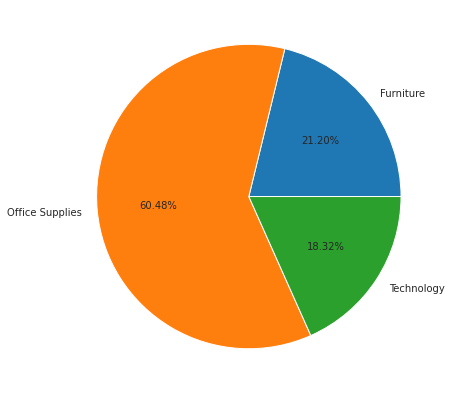

In [73]:
df = data.groupby(['Category']).agg({'Quantity':np.sum}).reset_index()
fig1 = plt.figure(figsize =(10,7))
plt.pie(df.Quantity, labels = df.Category,autopct='%1.2f%%')
# show plot
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71ccc6c050>,
      dtype=object)

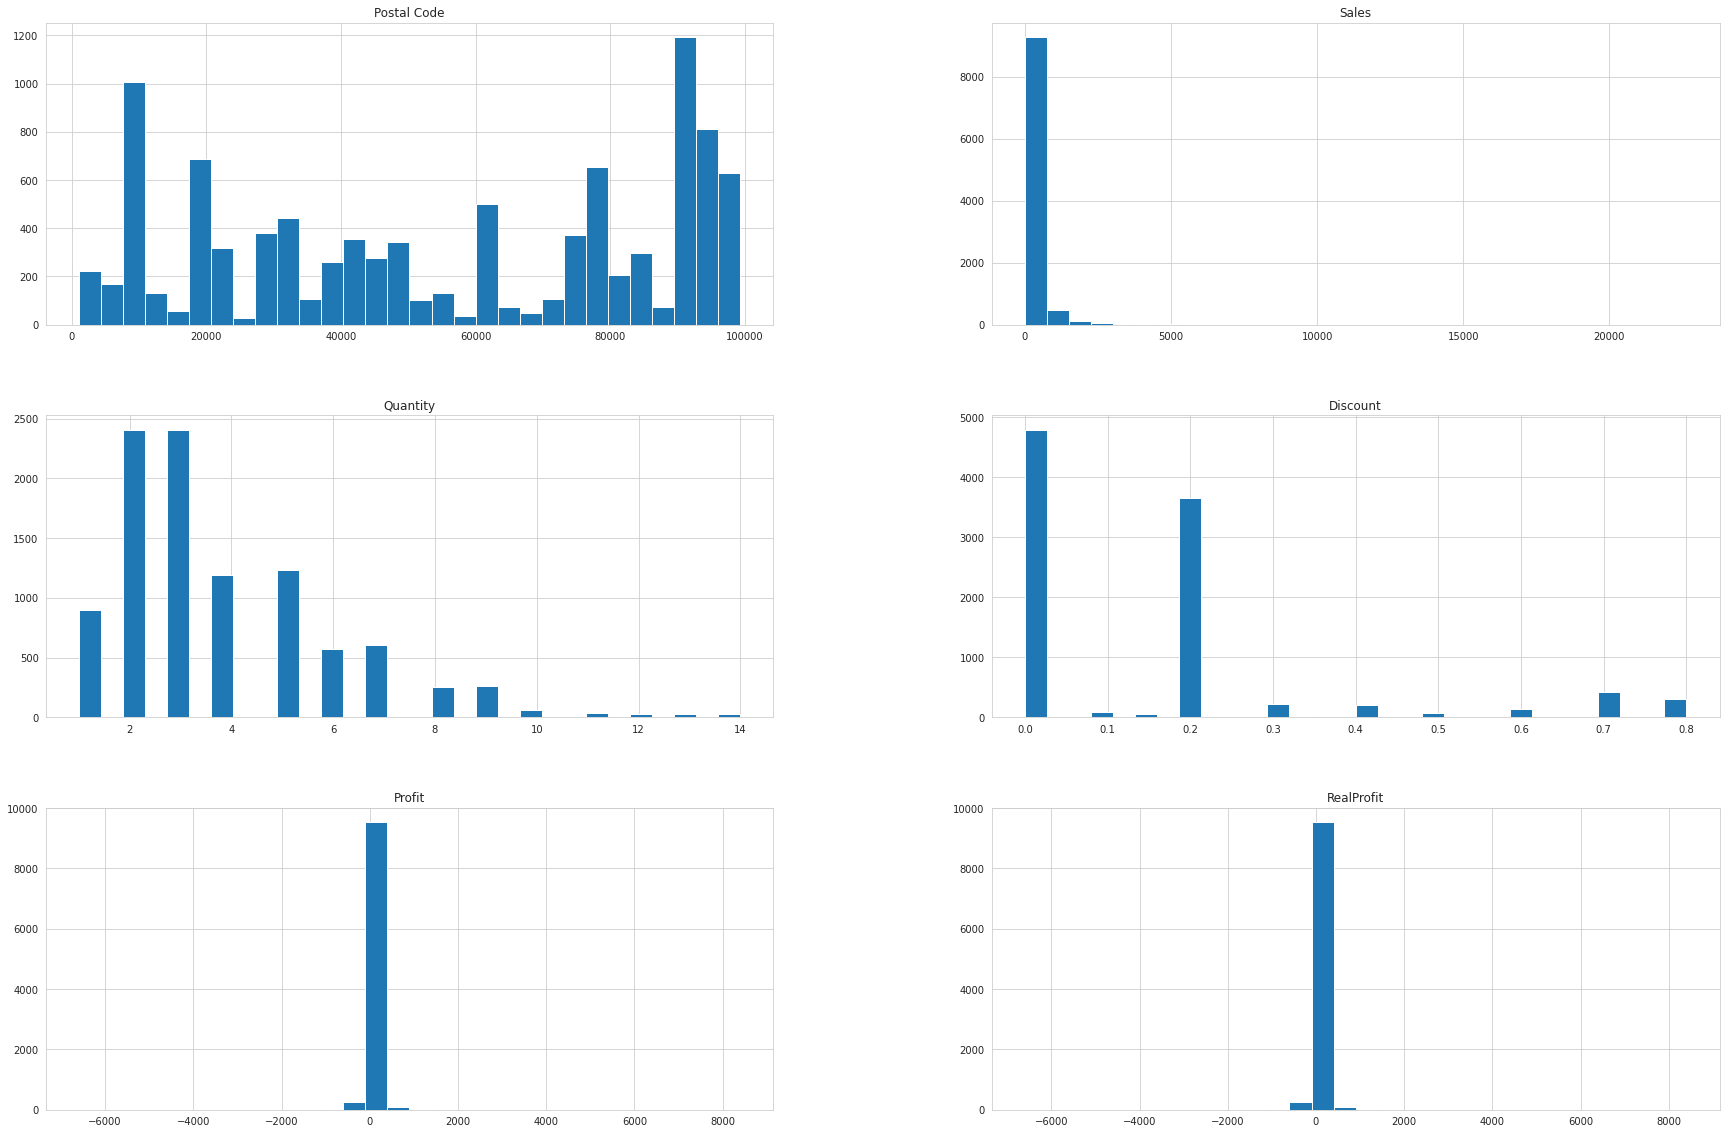

In [54]:
data.hist(bins=30, figsize=(30,20))
plt.show()

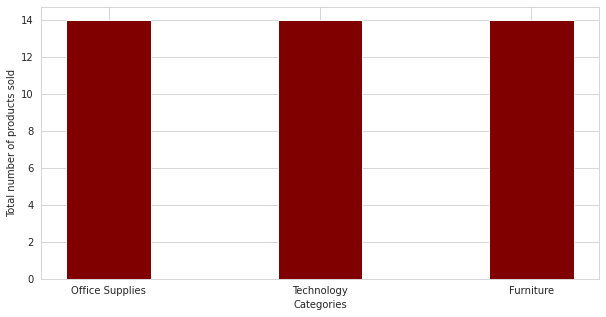

In [57]:
df=df.sort_values('Quantity')
fig2 = plt.figure(figsize = (10, 5))
plt.bar(df.Category, df.Quantity, color ='maroon', width = 0.4)
plt.xlabel("Categories")
plt.ylabel("Total number of products sold") # show plot 
plt.show() 


In [58]:
data['NormalizedPrice'] = data.iloc[:,5:6].apply(lambda x: (x-x.mean())/x.std(), axis=0)
data.head(20)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,RealProfit,NormalizedPrice
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,42,-0.398282
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,220,-0.398282
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7,1.086763
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-383,-0.682372
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,3,-0.682372
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,14,1.086638
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656,2,1.086638
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152,91,1.086638
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825,6,1.086638
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700,34,1.086638


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


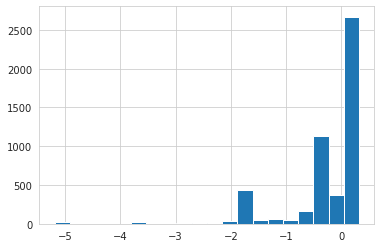

In [59]:
plt.hist(np.log(data.NormalizedPrice), bins=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


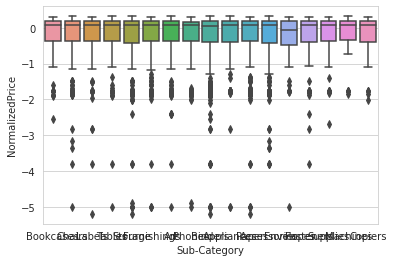

In [60]:
sns.boxplot(y= np.log(data.NormalizedPrice), x = data['Sub-Category'])

In [61]:
#Equal- Frequesncy
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
X= data.iloc[:,12:13]
X_binned = enc.fit_transform(X)
print('Original Data:\n',X.head(20))
print('Bin edges:\n',enc.bin_edges_)
print('Descritized Data:\n', X_binned[0:20,:])


Original Data:
       Profit
0    41.9136
1   219.5820
2     6.8714
3  -383.0310
4     2.5164
5    14.1694
6     1.9656
7    90.7152
8     5.7825
9    34.4700
10   85.3092
11   68.3568
12    5.4432
13  132.5922
14 -123.8580
15   -3.8160
16   13.3176
17    9.9900
18    2.4824
19   16.0110
Bin edges:
 [array([-6.599978e+03,  4.003200e-01,  5.443200e+00,  1.349130e+01,
         4.103880e+01,  8.399976e+03])                             ]
Descritized Data:
 [[4.]
 [4.]
 [2.]
 [0.]
 [1.]
 [3.]
 [1.]
 [4.]
 [2.]
 [3.]
 [4.]
 [4.]
 [2.]
 [4.]
 [0.]
 [0.]
 [2.]
 [2.]
 [1.]
 [3.]]


In [62]:
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
X= data.iloc[:,12:13]
X_binned = enc.fit_transform(X)
print('Original Data:\n',X.head(20))
print('Bin edges:\n',enc.bin_edges_)
print('Descritized Data:\n', X_binned[0:20,:])


Original Data:
       Profit
0    41.9136
1   219.5820
2     6.8714
3  -383.0310
4     2.5164
5    14.1694
6     1.9656
7    90.7152
8     5.7825
9    34.4700
10   85.3092
11   68.3568
12    5.4432
13  132.5922
14 -123.8580
15   -3.8160
16   13.3176
17    9.9900
18    2.4824
19   16.0110
Bin edges:
 [array([-6599.978     , -2131.10125469,  -305.0098314 ,   525.22541896,
         3318.08673734,  8399.976     ])                               ]
Descritized Data:
 [[2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [63]:
#correlation coefficients
df = data.drop('Quantity', 1)
df = df.drop('NormalizedPrice', 1)
corr_matrix = df.corr()
cor_target=corr_matrix
cor_target


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Postal Code,Sales,Discount,Profit,RealProfit
Postal Code,1.000000,-0.023854,0.058443,-0.029961,-0.029961
Sales,-0.023854,1.000000,-0.028190,0.479064,0.479061
Discount,0.058443,-0.028190,1.000000,-0.219487,-0.219497
Profit,-0.029961,0.479064,-0.219487,1.000000,0.999999
RealProfit,-0.029961,0.479061,-0.219497,0.999999,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


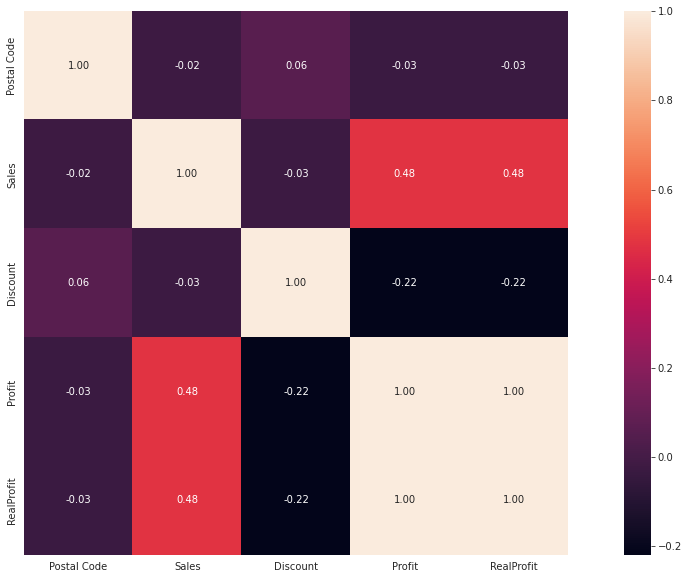

In [64]:
df = data.drop('Quantity', 1)
df = df.drop('NormalizedPrice', 1)
corrmat =df.corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmat,square=True,annot=True, fmt='.2f')

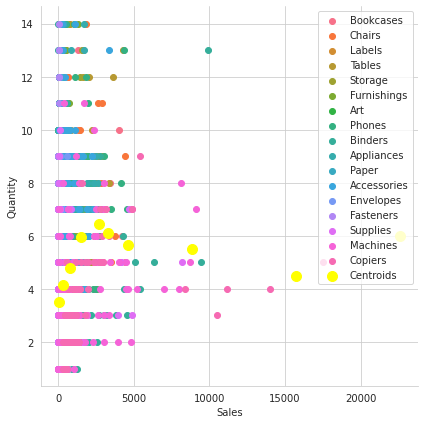

In [65]:
x = data.iloc[:, [9, 10, 11, 12]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', 
	max_iter = 300, n_init = 10, random_state = 0).fit(x) 
 wcss.append(kmeans.inertia_)
sns.set_style("whitegrid") 
sns.FacetGrid(data, hue ="Sub-Category",height =6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [66]:
Q1 = data.quantile(q = 0.25, axis = 0, numeric_only = True,interpolation = 'linear')
Q3 = data.quantile(q = 0.75, axis = 0, numeric_only = True,interpolation = 'linear')
IQR = Q3 - Q1
print(IQR)

Postal Code        66785.000000
Sales                192.660000
Quantity               3.000000
Discount               0.200000
Profit                27.635250
RealProfit            27.000000
NormalizedPrice        2.082885
dtype: float64


In [69]:
from sklearn.model_selection import train_test_split
x= data[['Ship Mode','Segment','Country','City','State','Region','Category','Sub-Category']]
y= data['RealProfit']
x

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage
...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper


In [71]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
x=x.apply(LabelEncoder().fit_transform)
x

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,2,0,0,194,15,2,0,4
1,2,0,0,194,15,2,0,5
2,2,1,0,266,3,3,1,10
3,3,0,0,153,8,2,0,16
4,3,0,0,153,8,2,1,14
...,...,...,...,...,...,...,...,...
9989,2,0,0,295,8,2,0,9
9990,3,0,0,104,3,3,0,9
9991,3,0,0,104,3,3,2,13
9992,3,0,0,104,3,3,1,12


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [75]:
x_train

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
4753,3,0,0,25,41,0,2,0
5938,3,0,0,379,41,0,2,13
4076,2,1,0,348,25,0,1,3
356,3,0,0,329,30,1,1,2
49,3,0,0,324,12,0,1,3
...,...,...,...,...,...,...,...,...
9225,1,2,0,55,41,0,1,3
4859,3,1,0,341,11,0,1,2
3264,2,1,0,295,8,2,1,10
9845,0,0,0,116,11,0,1,14


In [76]:
y_train

4753     6
5938    10
4076     3
356      7
49      18
        ..
9225    -6
4859     1
3264     4
9845    10
2732    20
Name: RealProfit, Length: 7995, dtype: int64

In [77]:

x_train.shape

(7995, 8)

In [78]:

y_train.shape

(7995,)

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeClassifier(random_state=5)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=5)

In [80]:
dt_model.score(x_train,y_train)

0.6421513445903689

In [81]:
dt_model.score(x_test,y_test)

0.04702351175587794

In [82]:
dt_model.predict(x_test)

array([  3, 104,  17, ..., 130,  10,  16])

In [83]:
dt_model.predict_proba(x_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
y_pred=dt_model.predict_proba(x_test)[:,1]

In [85]:
train_accuracy = []
validation_accuracy = []
for depth in range (1,10):
    dt_model=DecisionTreeClassifier (max_depth=depth, random_state=10)
    dt_model.fit(x_train, y_train)

train_accuracy.append(dt_model.score (x_train, y_train))
validation_accuracy.append (dt_model.score (x_test, y_test))

In [88]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [89]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True)

[Text(0.3362782193853088, 0.9814814814814815, 'X[7] <= 2.5\ngini = 0.984\nsamples = 7995\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1\n1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 4, 2, 1\n1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n2, 1, 2, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 2\n1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 3, 2, 2, 1\n1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1\n1, 2, 1, 1, 2, 2, 2, 1, 3, 1, 1, 2, 2, 3\n1, 1, 3, 1, 1, 3, 2, 1, 3, 1, 2, 3, 4, 2\n3, 1, 2, 1, 4, 3, 1, 2, 4, 1, 4, 2, 2, 2\n1, 1, 3, 4, 2, 2, 3, 3, 3, 7, 1, 1, 2, 3\n3, 2, 3, 4, 3, 4, 3, 1, 2, 4, 5, 2, 2, 2\n5, 2, 2, 3, 11, 5, 4, 3, 1, 7, 1, 2, 5, 4\n4, 5, 9, 3, 10, 9, 4, 5, 6, 5, 12, 7, 4, 11\n8, 6, 2, 4, 4, 6, 2, 17, 10, 10, 10, 15, 10\n11, 20, 13, 13, 9, 18, 20, 12, 9, 17, 19, 10\n28, 16, 19, 27, 39, 35, 27, 20, 33, 36, 50, 50\n51, 58, 66, 84, 62, 55, 133, 292, 326, 332, 352\n280, 301, 250, 196, 233, 173, 150, 14

In [ ]:
from sklearn.model_selection import train_test_split
x = data[['Sales','Discount','RealProfit']]
y = data['Quantity']
x

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#(Linear Regression)data.plot(x='Sales',y='RealProfit',style='.',color='c')
plt.title('Sales vs Profit',fontdict={'family':'Sans Serif','size':25})plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid()
plt.show()


In [ ]:

# we are converting data 2D into 1D 
X=data['Sales'].values.reshape(-1,1)
y=data['Profit'].values.reshape(-1,1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

In [ ]:
print('Intercept of the curve is:',lr.intercept_)
print('Slope of the curve is:',lr.coef_)

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
data=pd.DataFrame({'Actual Value': y_test.flatten(),'Predicted Value': y_pred.flatten()})
data

In [ ]:
  pred=lr.predict(x_test)

In [ ]:
  print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, pred))
  print('Mean Squared Error:',metrics.mean_squared_error(y_test, pred))
  print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, pred))) 

In [ ]:
plt.scatter(X_test,y_test,color='c')
plt.plot(X_test,y_pred,color='g',linewidth=2)
plt.show()